# Load libraries

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## ignore warnings
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# I. Questions

Did the advertisements help increase sales?
Which media's advertisements helped increase sales the most?

# II. Data Collection

In [291]:
data = pd.read_csv("Data/advertisingBudget_and_Sales.csv")
data.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [293]:
data = data[['TV Ad Budget ($)','Radio Ad Budget ($)', 'Newspaper Ad Budget ($)', 'Sales ($)']]

In [295]:
data.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

In [297]:
data.rename(columns={'TV Ad Budget ($)' : 'TV_Ad_Budget', 'Radio Ad Budget ($)' : 'Radio_Ad_Budget', 'Newspaper Ad Budget ($)': 'Newspaper_Ad_Budget', 'Sales ($)' : 'Sales'}, inplace=True)
data.columns

Index(['TV_Ad_Budget', 'Radio_Ad_Budget', 'Newspaper_Ad_Budget', 'Sales'], dtype='object')

In [299]:
## shape of data
data.shape

(200, 4)

In [301]:
## columns of data
data.columns

Index(['TV_Ad_Budget', 'Radio_Ad_Budget', 'Newspaper_Ad_Budget', 'Sales'], dtype='object')

In [303]:
## Get a quick description of the data (total number of rows, each attribute’s type, and number of non-null values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TV_Ad_Budget         200 non-null    float64
 1   Radio_Ad_Budget      200 non-null    float64
 2   Newspaper_Ad_Budget  200 non-null    float64
 3   Sales                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [305]:
## Basics statistics : summarize dataset with descriptives statistics
data.describe()

,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


The first line, count displays the number of observations. For example for Radio_Ad_Budget feature, there are 200 samples, the minimum is 0 and, the maximum is 49.600000. The mean is 23.264000 and the standard deviation is 14.846809. 25% of observations fall under 9.975000, 50% of observations fall under 22.900000 and 75% of observations fall under 36.525000

# III. Data Cleaning


Missing values of each column:
TV_Ad_Budget           0
Radio_Ad_Budget        0
Newspaper_Ad_Budget    0
Sales                  0
dtype: int64

Percentage of Missing Data:
TV_Ad_Budget           0.0
Radio_Ad_Budget        0.0
Newspaper_Ad_Budget    0.0
Sales                  0.0
dtype: float64


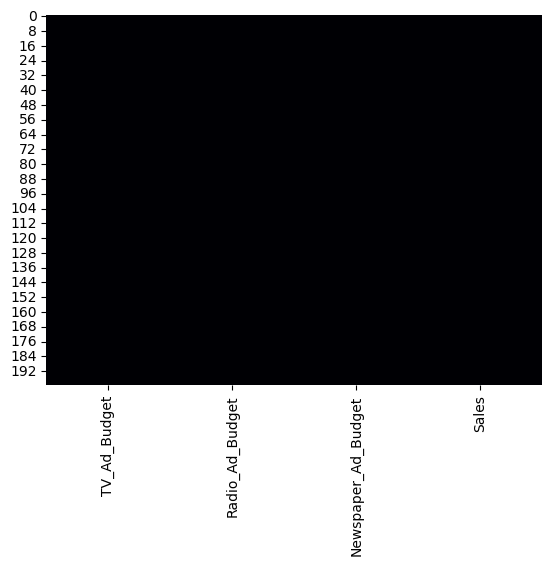

In [309]:
## Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values of each column:")
print(missing_values)

sns.heatmap(data.isnull(),cmap = 'magma', cbar = False)


missing_percentage = (missing_values / len(data)) * 100
print("\nPercentage of Missing Data:",)
print(missing_percentage)

In [311]:
## Duplicated Values are there?
duplicate = data.duplicated().sum()
print(duplicate)

0


# IV. Exploration Data Analysis (EDA) & Data Visualization

## Outliers detection

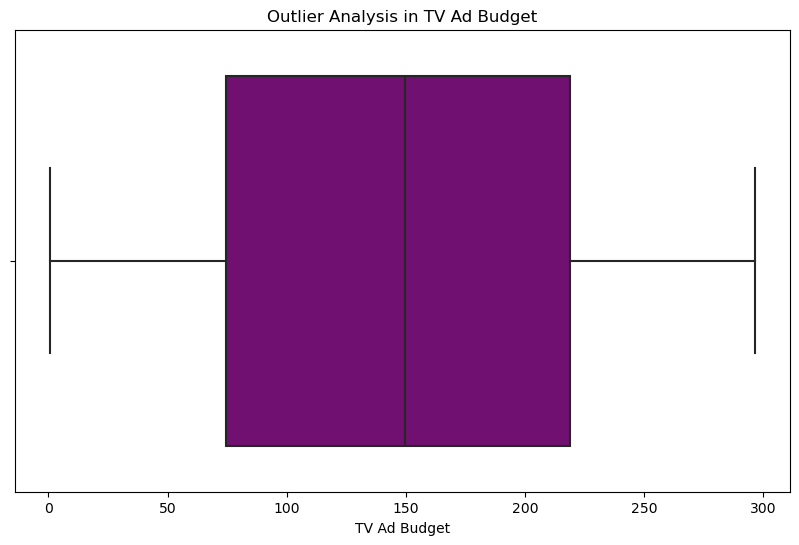

In [327]:
## Boxplot => TV Ad Budget attribute
plt.figure(figsize = (10,6))
sns.boxplot(x=data['TV_Ad_Budget'], color = 'purple')
plt.title('Outlier Analysis in TV Ad Budget')
plt.xlabel('TV Ad Budget')
plt.show()

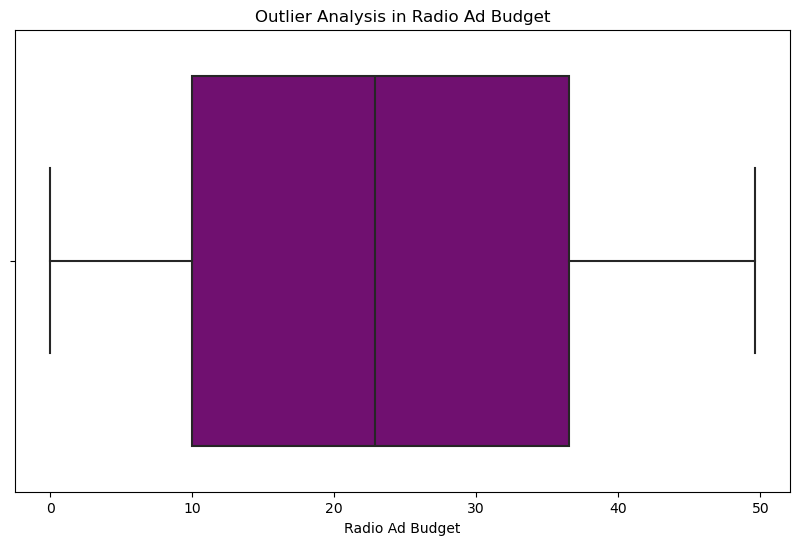

In [325]:
## Boxplot => Radio Ad Budget attribute
plt.figure(figsize = (10,6))
sns.boxplot(x=data['Radio_Ad_Budget'], color = 'purple')
plt.title('Outlier Analysis in Radio Ad Budget')
plt.xlabel('Radio Ad Budget')
plt.show()

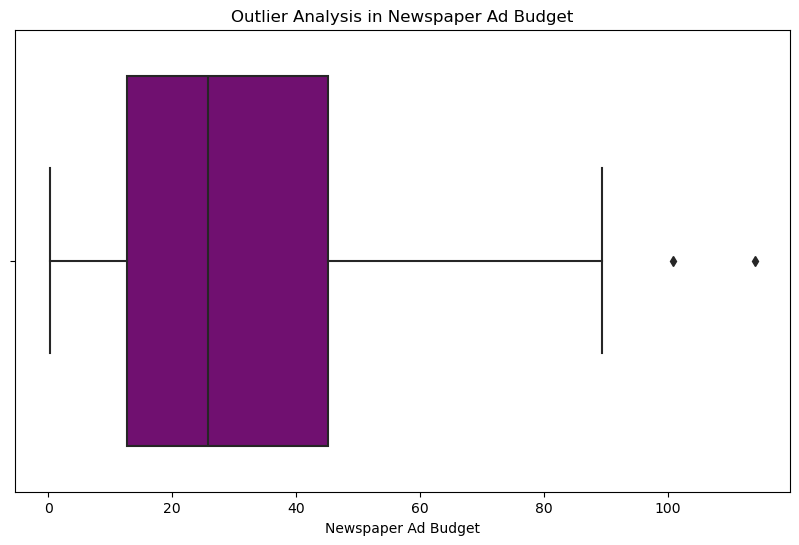

In [319]:
## Boxplot => Newspaper Ad Budget attribute
plt.figure(figsize = (10,6))
sns.boxplot(x=data['Newspaper_Ad_Budget'], color = 'purple')
plt.title('Outlier Analysis in Newspaper Ad Budget')
plt.xlabel('Newspaper Ad Budget')
plt.show()

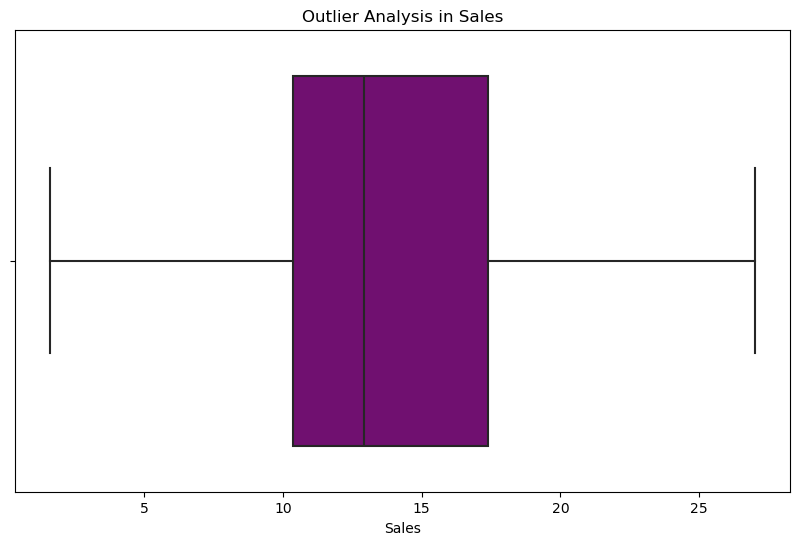

In [321]:
## Boxplot => Sales ($) attribute
plt.figure(figsize = (10,6))
sns.boxplot(x=data['Sales'], color = 'purple')
plt.title('Outlier Analysis in Sales')
plt.xlabel('Sales')
plt.show()


In [329]:
## delete outliers observations
data_without_outliers = data[data['Newspaper_Ad_Budget'] <= 100]

In [331]:
data_without_outliers.shape

(198, 4)

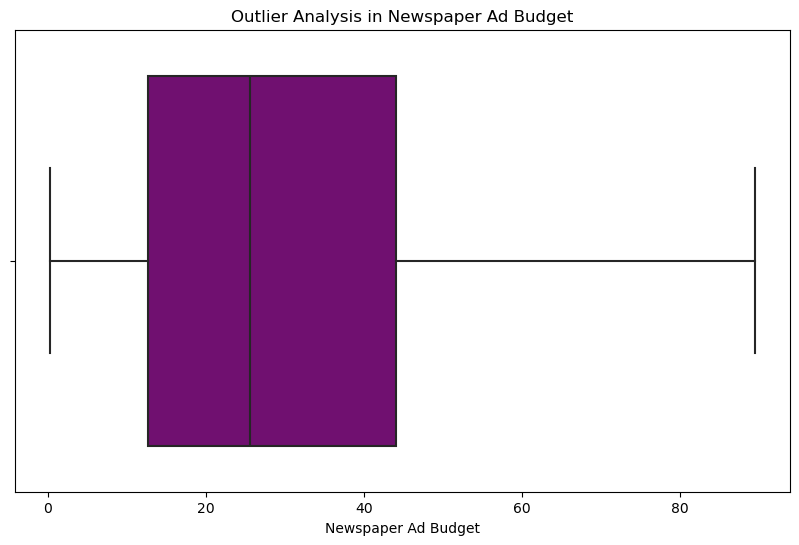

In [333]:
## Boxplot => Newspaper Ad Budget attribute without outliers
plt.figure(figsize = (10,6))
sns.boxplot(x=data_without_outliers['Newspaper_Ad_Budget'], color = 'purple')
plt.title('Outlier Analysis in Newspaper Ad Budget')
plt.xlabel('Newspaper Ad Budget')
plt.show()

### Correlation Analysis

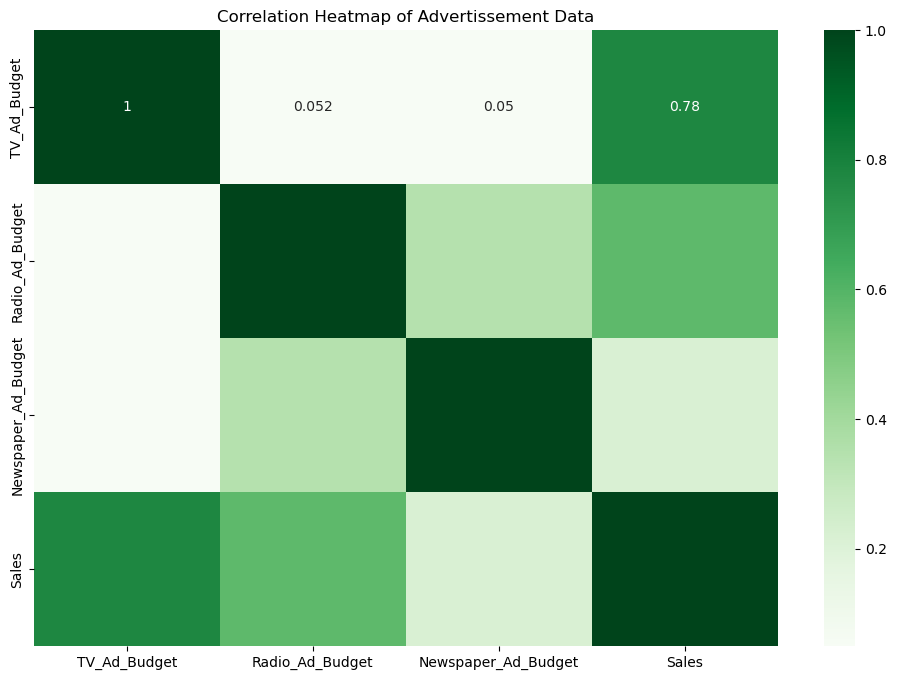

In [335]:
## Correlation Analysis - heatmap

plt.figure(figsize=(12,8))
sns.heatmap(data_without_outliers.corr(), annot=True, cmap="Greens")
plt.title('Correlation Heatmap of Advertissement Data')
plt.show()

We observe a greater correlation between TV and sales and note that the advertising budgets in the different channels (TV, Radio and Newspaper) have a weak correlation.

# V. Model

## Machine Learning model

In [339]:
## Data preparation: define X (features or independent variables) and y(target or dependent variable)
features = ['TV_Ad_Budget', 'Radio_Ad_Budget', 'Newspaper_Ad_Budget']
target = ['Sales']

X = data_without_outliers[features]
y = data_without_outliers[target]

In [341]:
X.head()

,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [343]:
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [345]:
## Splitting Data into training set and test set
## test_size specifies the proportion of data to be included in test set
## random_state ensures reproducibility of split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [347]:
print("\nTraining data shape: ",X_train.shape)
print("\nTest data shape: ",X_test.shape)


Training data shape:  (158, 3)

Test data shape:  (40, 3)


In [349]:
## check the size of training set and test set
print(f'Training set size : {X_train.shape[0]} samples')
print(f'Test set size : {X_test.shape[0]} samples')

Training set size : 158 samples
Test set size : 40 samples


### Linear Regression Model with Statsmodels.api library

In [351]:
## Training

## Adding a constant to the predictors because statsmodels'OLS doesn't include it by default
X_trainConst = sm.add_constant(X_train)
X_trainConst.head()

,const,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget
139,1.0,184.9,43.9,1.7
5,1.0,8.7,48.9,75.0
67,1.0,139.3,14.5,10.2
140,1.0,73.4,17.0,12.9
106,1.0,25.0,11.0,29.7


In [353]:
## Fit the OLS model
modelFitted = sm.OLS(y_train, X_trainConst).fit()

## Summary of model
print(modelFitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     431.1
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           1.12e-74
Time:                        00:38:28   Log-Likelihood:                -306.93
No. Observations:                 158   AIC:                             621.9
Df Residuals:                     154   BIC:                             634.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.9799    

### Linear Regression Model with scikit learn

### Train/Test/Evaluation with Sklearn

### Scaling the Data

In [355]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [359]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')

RMSE on Test Set: 1.6555699642993031
